#  Autore

Giulio Mazzacuva, 6060660, giulio.mazzacuva@stud.unifi.it

# Primalità dei numeri di Fuss-Catalan
In questo notebook vogliamo determinare quali sono i numeri primi a partire da una generalizzazione dei numeri di Fuss-Catalan. Di seguito mostreremo alcune simulazioni numeriche che riguardano i risultati ottenuti nell'articolo [On the Primality of the Generalized Fuss-Catalan Numbers][cn].
[cn]:https://cs.uwaterloo.ca/journals/JIS/VOL21/He/he61.pdf

Innanzitutto enunciamo alcune relazioni fondamentali. E' noto che gli unici numeri primi tra i numeri di Catalan sono $C_2=2$ e $C_3=5$. Dati gli interi $m\geq 2$ e $n,k\geq 1$, la successione dei numeri di Catalan è definita come segue:

$$C_{n} = \frac{1}{2n+1}\binom{2n+1}{n} = \frac{1}{n+1}\binom{2n}{n}$$

I primi 11 numeri di Catalan sono: 1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796 ($=C_{10}$). Osserviamo innanzitutto che la funzione di Catalan, per definizione, genera numeri interi positivi e, allo stesso modo anche ogni sua generalizzazione fa altrettanto. Consideriamo dunque una prima generalizzazione di $C_n$ inserendo un parametro $m$ in questo modo:

$$F_{m}(n) = \frac{1}{mn+1}\binom{mn+1}{n} = \frac{1}{(m-1)n+1}\binom{mn}{n}$$

I numeri che si ottengono dalla formula precedente prendono il nome di numeri di Fuss-Catalan. Sostanzialmente equivalgono ai numeri di Catalan per $m=2$. Possiamo generalizzare ancora di più inserendo un ulteriore parametro $k$. La formula sarà della forma $F_m(n,k)$ e prende il nome di Fuss-Catalan generalizzata:

$$ F_{m}(n,k) = \frac{k}{mn+k}\binom{mn+k}{n} = \frac{k}{(m-1)n+k}\binom{mn+k-1}{n} $$

Si osserva intuitivamente che la generalizzazione per $k$ porta alle seguenti uguaglianze: $F_m(n,1)=F_m(n)$ e $F_2(n)=F_2(n,1)=C_n$.

Allo scopo di verificare quanto appena detto, possiamo allora implementare una funzione che calcola l'n-esimo numero di Fuss-Catalan generalizzato usando sympy in questo modo: 

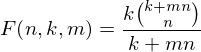

In [50]:
from __future__ import division
from sympy import *

init_printing()

m, n, k = symbols('m n k', positive=true, integers=true)

F = Function('F')
expr = k / (m * n + k) * binomial((m * n + k), n)
catalan = Eq(F(n, k, m), expr)
Generalized_Catalan = Lambda([n, k, m], expr)
catalan


Eseguiamo ora la funione Generalized_Catalan(n, k, m) per $k=1$ e $m=2$, e ci aspettiamo che i numeri generati dalla funzione corrispondano ai valori noti di Catalan citati sopra:

In [51]:
k = 1
m = 2
[(n, Generalized_Catalan(n, k, m).doit()) for n in range(1, 11)]


Come è evidente i valori ottenuti corrispondono al risultato desiderato. Dunque abbiamo verificato la correttezza delle generalizzazioni introdotte. 

Prima di proseguire, implementiamo un semplice metodo per la verifica della primalità di un numero. Questo metodo, che chiameremo 'isPrime()', prende in input una tupla di interi positivi e restituisce solo quelli che risultano primi tra quelli della tupla. Il metodo ci sarà utile in seguito per verificare la primalità dei numeri generati dalle funzioni in esame.

In [52]:
def isPrime(nums):
    i = len(nums)
    result = []
    for index in range(0, i):
        for n in range(2, nums[index]):
            if nums[index] % n == 0:
                nums[index] = -1
    for j in range(0, i):
        if nums[j] != -1:
            result = result + [nums[j]]
    print result


Il metodo suddetto è stato implementato sfruttando l'operatore modulo $n$ di un numero. Infatti un numero $n$ è primo se e soltanto se il resto dato dalla divisione intera tra $n$ e ogni altro numero (intero) compreso tra 2 ed $n$ risulta $0$, cioè in altre parole se e soltanto se $n$ è divisibile solo per se stesso e per 1. Questo è esattamente ciò che si è implementato utilizzando due cicli for, uno per scorrere la tupla di input, e uno per reiterare l'operazione modulo $n$ per tutti i numeri compresi tra $2$ ed $n$.

Verifichiamo l'attendibilità del metodo passandogli in input la tupla generata in precedenza dei numeri di Catalan.

In [53]:
isPrime([Generalized_Catalan(n, k, m).doit() for n in range(1, 9)])

[1, 2, 5]


La funzione restituisce i numeri primi (2 e 17) tra i primi otto numeri generati dalla funzione di Catalan. Facendo qualche esperimento è facile vedere come la funzione restituisce errore per numeri relativamente grandi. Come ci si aspetterebbe infatti, con la funzione di Catalan è facile generare velocemente numeri che raggiungono il limite superiore del massimo intero rappresentabile dal calcolatore.

Mostriamo ora un teorema che costituisce il risultato principale ottenuto sulla primalità dei numeri di Fuss-Catalan generalizzati.

# Teorema 1
Siano definiti i numeri di Fuss-Catalan generalizzati $F_{m}(n, k)$ con $m\geq 2$ e $n, k\geq 1$. Allora il generico numero $F_{m}(n, k)$ non è primo ad eccezione dei seguenti casi:

a) per $n\geq 3$ l'unico numero primo della forma $F_{m}(n, k)$ é $F_{2}(3, 1)=5$;

b) per $n=2$, $F_{p}(2, 1)=p$, dove $p$ è primo, e $F_{m}(2, 2)=2m+1$ quando $m=(p-1)/2$ e $p$ è primo;

c) per $n=1$, $F_{m}(1, k)=k$, dove $k$ è primo.

# dimostrazione:
Separiamo da dimostrazione in tre casi: caso a) $n\geq 3$, caso b) $n=2$ e caso c) $n=1$.

# a (caso $n\geq 3$)

Innanzitutto, facciamo vedere che per $n\geq 3$, $F_{m}(n,k)$ non è primo tranne che per $F_2(3,1)=5$. Abbiamo: 

$$F_m(n,k)=\frac{k}{(m-1)n+k}\binom{mn+k-1}{n}$$ 
$$= \frac{k}{(m-1)n+k}\frac{mn+k-1}{n}\frac{mn+k-2}{n-1}\cdots 
\frac{mn+k-(n-1)}{2}\frac{mn+k-n}{1}$$
$$= k\frac{mn+k-1}{n}\frac{mn+k-2}{n-1}\cdots \frac{mn+k-(n-2)}{3}\frac{mn+k-(n-1)}{2}$$

Dato che $m\geq 2$, $n\geq 3$, e $k\geq 1$, allora si ha che:

$$\frac{mn+k-1}{n}, \frac{mn+k-2}{n-1}, \ldots, \frac{mn+k-(n-3)}{4} >1 $$
e
$$\frac{mn+k-(n-2)}{3}\geq 2$$

osservando che $m\geq 2$, e combinando le suddette stime, si ricava: 

$$F_m(n,k)>k((m-1)n+k+1)\geq mn+k-1$$
per $k\geq 2$. Quindi, 

$$F_m(n,k)>mn+k-1$$

per $m\geq 2$, $n\geq 3$ e $k\geq 2$. Per verificare numericamente la correttezza di quest'ultima disuguaglianza possiamo eseguire la funzione Generalized_catalan(n, k, m) implementata prima in sympy. Se il risultato che otteniamo soddisfa la disuguaglianza, cioè i numeri generati risultano $\geq mn+k-1$ allora, a maggior ragione, la funzione dovrebbe restituire valori soddisfacenti all'aumentare del valore dei parametri in input. In altre parole, eseguiamo la funzione che calcola i numeri di Fuss-Catalan generalizzati a partire da $n=3, m=2, k=1$ e poi con valori crescenti via via (10 valori successivi), verifichiamo che questi soddisfino la condizione $\geq mn+k-1$. Per far ciò abbiamo implementato il metodo seguente:

In [54]:
def is_true():
    for k in range (2, 12):
        for m in range (2, 12):
            for n in range (3, 13):
                if Generalized_Catalan(n, k, m).doit() <= ((m*n) + k - 1):
                    return false
    return true
is_true()


Il metodo restituisce true, dunque la disuguaglianza è verificata. Ovviamente questa verifica numerica, così come quelle che seguiranno da quì in poi, non costituisce una vera e propria dimostrazione matematica. Infatti sperimentalmente è arduo dimostrare le suddette relazioni sui numeri primi per via numerica, a causa delle limitazioni dovute alla precisione di macchina finita e non solo. Per questo motivo le verifiche numeriche in sympy sono da considerare come prove empiriche a sostegno della dimostrazione matematica teorica.

Proseguiamo la dimostrazione notando che ogni fattore primo di $F_m(n,k)$ è minore o uguale a $mn+k-1$ poiché ciascun fattore di $F_m(n,k)$ deve essere un fattore del numeratore nella definizione di $F_m(n,k)$. Quindi, se $F_m(n,k)$ fosse primo, avremmo che $F_m(n,k) \leq mn+k-1$, che contraddice la relazione $F_m(n,k)>mn+k-1$. Dunque, $F_m(n,k)$ è un numero composito.

Abbiamo finito di trattare il sotto-caso di (a) dove $n\geq 3$ e $k\geq 2$, e ora consideriamo il sotto-caso di $n\geq 3$ e $k=1$, ad esempio, il caso di: 

$$F_m(n,1)=\frac{1}{(m-1)n+1}\binom{mn}{n}$$
Se $n=3$, allora la precedente diventa:
$$F_m(3,1)=\frac{1}{3m-2}\binom{3m}{3}=\frac{m(3m-1)}{2}$$

Se $m=2\ell +1$, con $\ell \geq 1$, cioè $m$ è dispari, allora l'equazione suddetta implica che $F_{2\ell+1}(3,1)=(2\ell+1)(3\ell+1)$ non è un numero primo. Infatti: 

In [55]:
import random

l = random.randint(1,100)             #generiamo l casualmente
n = 3
k = 1
m = (2 * l) + 1                       #m dispari
Generalized_Catalan(n, k, m).doit()


eseguendo la funzione che genera numeri di fuss-catalan generalizzati della forma $F_{2\ell+1}(3,1)$ con $\ell$ generato casualmente, otteniamo un numero non primo. Infatti verificando la primalità con il metodo isPrime() implementato prima, otteniamo una tupla vuota:

In [56]:
isPrime([Generalized_Catalan(n, k, m).doit()])

[]


Se invece $m=2\ell$, con $\ell\geq 1$ è pari, allora sempre l'equazione suddetta implica che $F_{2\ell}(3,1)=\ell (6\ell -1)$ non è un numero primo a meno di $\ell=1$. Come prima, facciamo la stessa verifica in sympy utilizzando questa volta un $m$ pari e un $\ell$ maggiore di uno. Otteniamo: 

In [57]:
l = random.randint(2,100)             #generiamo l casualmente
n = 3
k = 1
m = 2 * l                             #m pari
Generalized_Catalan(n, k, m).doit()


il risultato é ancora un numero non primo. Infatti:

In [58]:
isPrime([Generalized_Catalan(n, k, m).doit()])

[]


Proviamo ora con $\ell = 1$. 

In [59]:
l = 1
n = 3
k = 1
m = 2 * l                             
Generalized_Catalan(n, k, m).doit()


Il risultato è 5 che, essendo primo, è ciò che ci aspettavamo visto quanto detto precedentemente.

Quindi, $F_2(3,1)=5$ risulta l'unico numero primo per $m\geq 2$ e $n=3$. L'ultimo passo finale di (a) che non è stato ancora considerato è $n\geq 4$ e $k=1$. Similmente a quanto fatto per il primo sotto-caso, scriviamo $F_m(n,1)$ come:

$$F_m(n,1)=\frac{1}{(m-1)n+1}\binom{mn}{n}$$
$$=\frac{1}{(m-1)n+1}\frac{mn}{n}\frac{mn-1}{n-1}\cdots \frac{mn-(n-3)}{3}\frac{mn-(n-2)}{2}\frac{mn-(n-1)}{1}$$
$$=\frac{mn}{n}\frac{mn-1}{n-1}\cdots \frac{mn-(n-4)}{4}\frac{mn-(n-3)}{3}\frac{mn-(n-2)}{2}$$
$$> \frac{mn-(n-4)}{4}\frac{mn-(n-3)}{3}\frac{mn-(n-2)}{2}$$
$$\geq 2 \frac{7}{3}\frac{mn-(n-2)}{2}$$
$$> 2(mn-(n-2)) > mn$$

dove abbiamo usato $n\geq 4$ e $m\geq 2$ cosicché $mn-(n-4)/4\geq 2$ e $(mn-(n-3)/3\geq 7/3$, e quest'ultima disuguaglianza è dovuta al fatto che $m\geq 2$. Quindi, $F_m(n,1)$ non è primo quando $n\geq 4$. Questo conclude la dimostrazione del caso (a). 

# b (caso $n=2$)

Sotto l'assunzione che $n=2$, si ha che:

$$ F_{m}(2, k) = \frac{k}{2(m-1)+k}\binom{2m+k-1}{2} = \frac{k(2m+k-1)}{2} $$

Dunque dato $p$ un numero primo, se $k=1$ e $m=p$, allora $F_m(2,k)=p$ è primo. Questo è abbastanza evidente, perché se si sostituiscono $k$ ed $m$ nella precedente relazione si ottiene banalmente $p$. Vediamo cosa succede ora se invece $k\neq 1$: 

$k$ può essere pari, quindi $k=2l$ con $l\geq 1$, oppure dispari, ovvero $k=2l+1$. Nel primo caso si vede facilmente che l'unica eventualità in cui $F_m(2,2l)$ è primo occorre quando $l=1$ e $2m+1$ è primo, poiché:

$$F_m(2,2l) = l(2m+2l-1)$$

Nel secondo caso invece, sostituendo $k$ con $2l+1$, abbiamo che:

$$F_m(2, 2l+1) = (2l+1)(m+l)$$

che non è un numero primo in nessun caso. Quindi b) è dimostrato.

Come abbiamo fatto anche prima, senza riscrivere la funzione $F_m(2,k)$ in sympy, sfruttiamo la funzione Generalized_Catalan(n, k, m) per verificare la veridicità del teorema nel caso $k=2l+1$, per un numero limitato di iterazioni.

In [60]:
temp = []
n = 2
m = 7                                                   #numero primo scelto casualmente
for i in range(2, 20):                                  #per ogni i > 1
    k = 2 * i + 1                                       #assegna a k il numero dispari (2i + 1)
    temp = temp + [Generalized_Catalan(n, k, m).doit()] #esegue la funzione con k ed m in input...
temp                                                    #...e li memorizza nella tupla temp


Come si nota, per la nostra verifica abbiamo scelto un numero primo a caso ($m=7$) ed eseguito la funzione di Fuss-Catalan generalizzata $F_7(2, 2i+1)$ per diciotto volte, ovvero per $i$ che va da 2 a 20, ottenendo sempre numeri non primi. Infatti passando in input questi numeri alla funzione isPrime() si ottiene una tupla vuota:

In [61]:
isPrime(temp)

[]


Questo esperimento avvalora quanto dimostrato prima per via matematica.

# c (caso $n=1$)

Quando $n=1$ si ha che:

$$F_m(1,k) = \frac{k}{m-1+k}\binom{m-1+k}{1} = k$$

e quindi $F_m$ è primo esattamente quando $k$ è primo. Questo completa la dimostrazione del teorema. Anche in questo caso possiamo verificare il risultato con sympy. Similmente a prima, eseguiamo la funzione Generalized_Catalan per ogni $m$ che va da $2$ a $12$, con $k=5$ (numero primo scelto casualmente).

In [62]:
k = 5
n = 1
for i in range(2, 12):
    m = i
    print [i, Generalized_Catalan(n, k, m).doit()]
    

[2, 5]
[3, 5]
[4, 5]
[5, 5]
[6, 5]
[7, 5]
[8, 5]
[9, 5]
[10, 5]
[11, 5]


Come ci saremmo aspettati abbiamo ottenuto per dieci volte numeri di fuss-catalan pari a 5, che è esattamente il $k$ scelto inizialmente. Questo conferma quanto dimostrato. Seguono due corollari.

# Corollario 2

Siano $F_m(n,1)$ i numeri di Fuss-Catalan come definiti all'inizio del notebook. Allora nessuno di questi è primo eccetto che $F_p(2,1)=p$, dove $p$ è primo, e $F_2(3,1)=5$.


# Corollario 3

I numeri di Catalan $C_n$ non sono primi, eccezion fatta per $C_2=2$ e $C_3=5$.



# Numeri di Lobb

I numeri di Lobb sono definiti in questo modo:

$$L_{n, m} = \frac{2m+1}{n+m+1}\binom{2n}{n+m}$$

per $n\geq m \geq 0$. Questi numeri si possono interpretare così: $L_{n, m}$ è il numero delle sequenze di lunghezza $2n$ dove $n+m$ termini sono uguali a 1 e $n-m$ termini sono pari a -1, cosicché nessuna somma parziale risulti negativa. Questi numeri possono essere generalizzati in modo tale che il numero di sequenze con termini uguali a 1 sono $(k-1)n+m$, ed $n-m$ termini sono uguali a $1-k$. La versione generalizzata dei numeri di Lobb si indica con $L^{k}_{n, m}$ e ha la forma:

$$L^{k}_{n, m} = \frac{km+1}{(k-1)n+m+1}\binom{kn}{(k-1)n+m}$$

Scriviamo la funzione che genera questi numeri in sympy, ed in seguito deduciamo alcune proprietà.

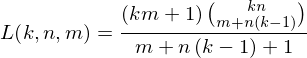

In [63]:
m, n, k = symbols('m n k', positive=true, integers=true)

L = Function('L')
expr = ((k * m + 1) / ((k - 1) * n + m + 1)) * binomial((k * n), (k - 1) * n + m)
lobb = Eq(L(k, n, m), expr)
Generalized_Lobb = Lambda([k, n, m], expr)
lobb


La caratteristica particolare di questi numeri risiede nel fatto che essi includono molte altre sequenze di numeri come sotto-casi. Ad esempio è evidente che se $k=2$, i numeri $L^{2}_{n, m}$ corrispondono ai numeri di Lobb classici. E ancora, quando $m=0$, questi numeri diventano i numeri di Fuss-Catalan, infatti:

$$ L^{k}_{n, 0} = \frac{1}{(k-1)n+1}\binom{kn}{n}= F_k(n)$$

Per verificare numericamente quanto affermato confrontiamo gli output delle due funzioni (generalizzata di Lobb e di Fuss-Catalan) e vediamo se sono uguali tra loro. Di seguito sono mostrati gli output relativi numeri generati rispettivamente con la funzione di Fuss-Catalan e con la generalizzata di Lobb. 

In [64]:
result = []
k = 1 
for m in range(1, 6):
    for n in range(1, 6):
        result = result + [Generalized_Catalan(n, k, m).doit()]
result


In [65]:
result = []
m = 0
for k in range(1, 6):
    for n in range(1, 6):
        result = result + [Generalized_Lobb(k, n, m).doit()]
result


Come si può osservare gli output corrispondono, quindi quanto detto prima è verificato, cioè per $m=0$ la funzione generalizzata di Lobb corrisponde quella di Fuss-Catalan. Notiamo che nel codice implementato per generare i numeri di Fuss-Catalan abbiamo posto $k=1$. Questo perché inizialmente avevamo già implementato la funzione Generalized_Catalan(n, k, m) che genera numeri di Fuss-Catalan generalizzati e, come spiegato all'inizio, questa corrisponde alla funzione che genera numeri di Fuss-Catalan proprio per $k=1$.

Proseguendo ora la discussione sulle caratteristiche dei numeri di Lobb, vediamo che per $k=2$ ed $m=0$ i numeri di Lobb corrispondono esattamente ai numeri di Catalan classici. Come prima, possiamo fare una verifica numerica e osservare se gli output delle due funzioni in esame corrispondono. Chiaramente, ricordando che la funzione generatrice dei numeri di Fuss-Catalan generalizzati genera numeri di Catalan classici per $k=1$ e $m=2$, confrontiamo gli output sulla base del codice implementato seguente:

In [66]:
result = []
k = 1
m = 2
for n in range(1, 16):
    result = result + [Generalized_Catalan(n, k, m).doit()]
result


In [67]:
result = []
k = 2
m = 0
for n in range(1, 16):
    result = result + [Generalized_Lobb(k, n, m).doit()]
result


I due output corrispondono, quindi abbiamo ottenuto il risultato desiderato.

Un'altra caratteristica dei numeri di Lobb è che per $k = 1$ questi numeri corrispondono esattamente ai coefficienti binomiali. Vi sono inoltre molti altri casi particolari di questi numeri, ma esulano dallo scopo di questo notebook.

Analizziamo ora un interessante analogia tra i numeri di Lobb e i numeri di Fuss-Catalan generalizzati. In effetti, data F la funzione di Fuss-Catalan generalizzata, vale la seguente relazione: 

$$L^k_{n,m}=F_k(n-m, km +1)$$

oppure, invertendo la relazione:

$$F_m(n, k) = L^m_{n+(k-1)/m, (k-1)/m} $$

dove quest'ultima può essere utilizzata per trasferire i risultati ottenuti dal Teorema 1 (per i numeri di Fuss-Catalan generalizzati) ai corrispondenti risultati per i numeri di Lobb generalizzati. In effetti, volendo verificare numericamente la suddetta relazione, si può far vedere come è possibile ottenere il medesimo risultato dall'esecuzione delle due funzioni per $k, m, n$ fissati:

In [68]:
m, n, k = symbols('m n k', positive=true, integers=true)

k = 5   #parametri fissati, scelti casualmente
m = 2
n = 3

i = n + (k - 1)/m
j = (k - 1)/m

print 'Risultato Lobb gen. :'
print Generalized_Lobb(m, int(i), int(j)).doit()
print 'Risultato F-Catalan gen. :'
print Generalized_Catalan(n, k, m).doit()


Risultato Lobb gen. :
75
Risultato F-Catalan gen. :
75


Alla luce di questo risultato quindi enunciamo il seguente corollario.

# Corollario 4

Dati $m\geq 2$ e $n,k\geq 1$ interi, gli unici numeri di Lobb generalizzati che risultano primi sono $L^m_{1+(k-1)/m,(k-1)/m}=k$, dove $k$ è primo, $L^p_{2,0}=p$, dove $p$ è primo, $L^2_{3,0}=5$, e $L^m_{2+1/m,1/m}=2m+1$, dove $m=(p-1)/2$ e $p$ è primo.

Omettiamo la dimostriazione matematica di questo Corollario, ma proviamo comunque a eseguire il test di primalità sui numeri di Lobb generalizzati utilizzando il nostro metodo isPrime(). Generiamo quindi alcuni numeri con la funzione di Lobb generalizzata e li passiamo in input a isPrime().

In [69]:
temp = []
j = 4                    # (parametri i e j scelti casualmente)
m = 3
for i in range(5, 10):
    temp = temp + [Generalized_Lobb(m, i, j).doit()]
temp


In [70]:
isPrime(temp)

[13]


Abbiamo generato 5 numeri di Lobb generalizzati con parametri di input scelti casualmente. Siamo stati fortunati, poiché siamo riusciti a ottenere un numero primo. In effetti, dalla tesi del corollario si evince che ci troviamo nel primo caso, in cui $L^m_{1+(k-1)/m,(k-1)/m}=k$, dove $k=13$ (che è primo) nel nostro caso. Per verificarlo basta osservare che nel codice implementato abbiamo indicato con $i$ e $j$ rispettivamente i parametri $n$ ed $m$ della funzione originaria, ovvero abbiamo eseguito la funzione $L^m_{i, j}$, con $i = 1+(k-1)/m$,  e  $j=(k-1)/m$. Facendo le opportune sostituzioni è facile verificare la correttezza del risultato ottenuto. 

# Ballot numbers

I numeri di Lobb della forma $L^2_{n,m}$ sono in relazione anche con i ballot numbers. Questi sono della forma:

$$B(a,b) = \frac{a-b}{a+b}\binom{a+b}{a} = \frac{a-b}{a+b}\binom{a+b}{b}$$

Nominalmente, vale la seguente relazione:

$$L^2_{n,m}=B(n+m+1, n-m)$$

o, equivalentemente:

$$B(n,m)= L^2_{\frac{n+m-1}{2},\frac{n-m-1}{2}}$$

Per verificare numericamente questa relazione, come prima confronteremo gli output delle due funzioni e osserveremo se sono esattamente uguali. Innanzitutto scriviamo il codice che implementa la funzione generatrice dei ballot numbers.

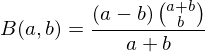

In [71]:
a, b = symbols('a b', positive=true, integers=true)

B = Function('B')
expr = ((a - b) / (a + b)) * binomial(a + b, b)
ballot = Eq(B(a, b), expr)
Ballot = Lambda([a, b], expr)
ballot


Eseguiamo ora le due funzioni (ballot numbers e Lobb) con $n, m$ fissati e verifichiamo se gli output coincidono. Notiamo che per ottenere la funzione generatrice dei numeri di Lobb, è sufficiente utilizzare la funzione generatrice per i numeri di Lobb generalizzati implementata in precedenza con $k=2$.

In [72]:
k = 2   

m = 8           # parametri m, n fissati, scelti casualmente
n = 9
a = n + m + 1
b = n - m

print 'Risultato Lobb:'
print Generalized_Lobb(k, n, m).doit()
print 'Risultato Ballot:'
print Ballot(a, b).doit()


Risultato Lobb:
17
Risultato Ballot:
17


I due output coincidono, quindi abbiamo verificato (numericamente) la relazione. Concludiamo affermando che $L^2_{n,m}$ è un ballot number. Inoltre, dal Corollario 4 segue immediatamente che:

# Corollario 5

Sia $B(a,b)$ la funzione generatrice dei ballot numbers come definita sopra. Quindi gli unici numeri primi della forma $B(a,b)$ sono $B(k+1,1)=k$, dove $k$ è primo, $B(3,2)=2$, e $B(4,2)=B(4,3)=5$.

Come per il precedente Corollario proviamo a eseguire il test di primalità su alcuni ballot numbers.

In [73]:
temp = []
b = 1
for k in range(1, 20):
    a = k + 1
    temp = temp + [Ballot(a, b).doit()]
temp


In [74]:
isPrime(temp)

[1, 2, 3, 5, 7, 11, 13, 17, 19]


E' facile notare che il codice è stato scritto per ricadere volutamente nel primo caso della tesi del corollario, ovvero con parametri di input $a=k+1$ e $b=1$. Con questo abbiamo verificato numericamente che i primi 20 ballot numbers risultano primi se $k$ è primo. Inoltre osserviamo come la funzione generatrice con i suddetti parametri di input in realtà corrisponde ad una successione di interi consecutivi.